# **🌲 Forest Cover Type Classification**
### 📌 Task Overview
In this project, we predict the type of forest cover using cartographic and environmental features.
The dataset used is Covertype (UCI), which is a multi-class classification problem.

### 🎯 Objectives
Preprocess and clean the dataset
Train and evaluate tree-based classification models (Random Forest, XGBoost)
Visualize confusion matrix and feature importance
Bonus: Perform hyperparameter tuning and model comparison
Required Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import gzip
import warnings
warnings.filterwarnings('ignore')

# Load DataSet

In [2]:
with gzip.open(r"C:\Users\g3fr\Desktop\elevvo internship\Task 3\covtype.data.gz", 'rt') as f:
    df = pd.read_csv(f, header=None)
print(df.head())


     0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]


# Exploring the data

In [3]:
df.shape

(581012, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
columns = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# 4 Wilderness_Area binary columns
columns += [f'Wilderness_Area_{i}' for i in range(4)]

# 40 Soil_Type binary columns
columns += [f'Soil_Type_{i}' for i in range(40)]

# Target
columns += ['Cover_Type']

# Assign
df.columns = columns


In [7]:
df.info()
df['Cover_Type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_0                   581012 non-null  int64
 11  Wilderness_Area_1                   581012 non-null 

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [8]:
correlation = df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False)
print(correlation)

Cover_Type                            1.000000
Wilderness_Area_3                     0.323200
Soil_Type_9                           0.243876
Soil_Type_37                          0.160170
Soil_Type_38                          0.155668
Slope                                 0.148285
Soil_Type_39                          0.128351
Soil_Type_1                           0.118135
Soil_Type_5                           0.112958
Soil_Type_3                           0.099672
Soil_Type_0                           0.090828
Soil_Type_16                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_34                          0.080315
Soil_Type_36                          0.080271
Soil_Type_4                           0.077890
Soil_Type_2                           0.068064
Wilderness_Area_2                     0.066846
Soil_Type_13                          0.065562
Soil_Type_10                          0.035379
Soil_Type_35                          0.025397
Soil_Type_12 

correlation results show that "Slope" has a correlation of 0.148 with Cover_Type, which means it’s not just random noise—it carries some useful information for predicting the forest cover type.

# 🧹 Data Preprocessing


Handle missing values (if any)
Convert categorical variables (e.g., Wilderness_Area, Soil_Type)
Split data into features (X) and target (y)
Normalize or scale continuous features if needed

In [9]:
df.isnull().sum()


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


# Feature-target split

In [10]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# 📊 Class Distribution Check

Before applying classification models, we check the distribution of the target variable Cover_Type.
Imbalanced datasets can bias the model toward majority classes. If imbalance is detected, we will apply class weights or resampling methods.

In [11]:

print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64
Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64


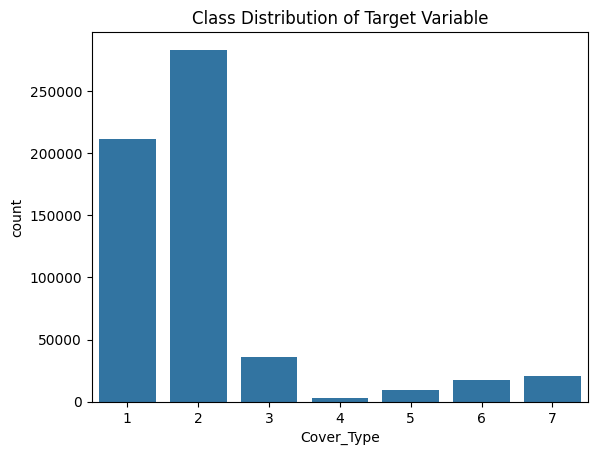

In [ ]:
sns.countplot(x=y)
plt.title("Class Distribution of Target Variable")
plt.show()

**class distribution for Cover_Type clearly shows imbalance:**
\
Class 2: ~48.8% of the data

Class 1: ~36.5% of the data

Class 4: less than 0.5% of the data

This means the model could easily favor classes 1 and 2 while ignoring minority classes (4, 5, 6, 7), leading to high accuracy but poor recall for rare classes.

# Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)


# Model Training Random Forest

In [14]:
rf = RandomForestClassifier(n_estimators = 200 , random_state = 42 , class_weight = 'balanced', n_jobs=-1 )
rf.fit(X_train , y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



# Model Prediction

In [15]:
y_pred = rf.predict(X_test)


📊 Model Evaluation Metrics
We evaluate the Random Forest model using multi-class metrics:

Accuracy: Overall percentage of correctly classified samples.
Precision (Macro): Average precision across all classes.
Recall (Macro): Average recall (sensitivity) across all classes.
F1 Score (Macro): Harmonic mean of precision and recall across classes.

In [16]:
print(metrics.classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.79      0.86      1899
           6       0.94      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [17]:
accuracy_rf = metrics.accuracy_score(y_test, y_pred)
precision_rf = metrics.precision_score(y_test, y_pred, average='macro')
recall_rf = metrics.recall_score(y_test, y_pred, average='macro')
F1_score_rf = metrics.f1_score(y_test, y_pred, average='macro')

print({
    "Accuracy": accuracy_rf,
    "Precision (Macro)": precision_rf,
    "Sensitivity/Recall (Macro)": recall_rf,
    "F1 Score (Macro)": F1_score_rf
})

{'Accuracy': 0.9550786124282505, 'Precision (Macro)': 0.9460982737347926, 'Sensitivity/Recall (Macro)': 0.9085028797561466, 'F1 Score (Macro)': 0.9259664847786178}


In [18]:
results_df = pd.DataFrame({
    'Actual Cover Type': y_test.reset_index(drop=True),
    'Predicted Cover Type': y_pred
})

results_df.head(10)

,Actual Cover Type,Predicted Cover Type
0,1,1
1,3,3
2,2,2
3,3,3
4,1,1
5,6,3
6,1,1
7,1,1
8,2,2
9,2,2


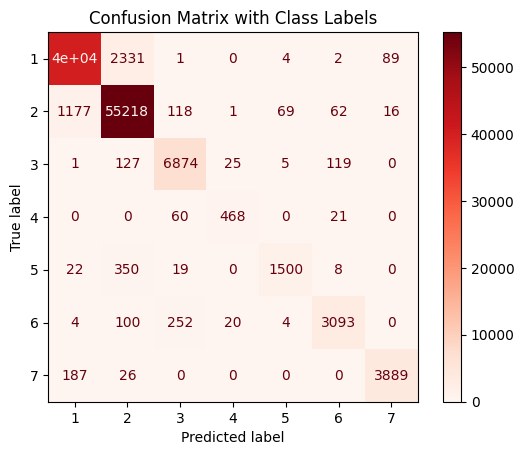

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

# 🔧 Hyperparameter Tuning

We use GridSearchCV to optimize hyperparameters for XGBoost:

XGBoost:
* n_estimators
* max_depth
* learning_rate

Cross-validation (cv=3) is used to evaluate parameter combinations and select the best-performing configuration

# ⚠️ Adjusting Labels for XGBoost

XGBoost requires class labels to start from 0.

Since our Cover_Type classes range from 1 to 7, we subtract 1 from the labels before training and add 1 back to predictions.

In [20]:
# Shift class labels to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

In [23]:
param_grid_xgb = {
    'n_estimators' : [500],
    'max_depth' : [4, 6],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1]
}

grid_search = GridSearchCV(XGBClassifier(random_state = 42), param_grid_xgb , cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train_adj)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 500}
Best score:  0.9567779455204534


# Handling Class Imbalance in XGBoost

To handle imbalanced classes, we assign higher weights to samples of minority classes.

XGBoost uses the sample_weight parameter during training to give these samples more importance.

Steps:

1. Calculate class weights based on class frequencies.
2. Create an array of weights for each training sample.
3. Train XGBoost using sample_weight.

In [24]:
# Compute class weights
classes = np.unique(y_train_adj)
weights = compute_class_weight('balanced' , classes = classes , y = y_train_adj)
weights

array([ 0.39181272,  0.29298132,  2.32147976, 30.20986611,  8.74391437,
        4.77913385,  4.04688479])

In [25]:
weight_dict = dict(zip(classes,weights))
weight_dict

{np.int64(0): np.float64(0.39181272253992233),
 np.int64(1): np.float64(0.29298131712974634),
 np.int64(2): np.float64(2.3214797648598298),
 np.int64(3): np.float64(30.209866112049916),
 np.int64(4): np.float64(8.743914368486399),
 np.int64(5): np.float64(4.779133850171708),
 np.int64(6): np.float64(4.046884794873581)}

In [26]:

# Assign sample weights
sample_weights = np.array([weight_dict[label] for label in y_train_adj])


# Model Training XGBoost

In [28]:

xgb = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=1 , random_state = 42 , n_jobs=-1)
xgb.fit(X_train, y_train_adj , sample_weight = sample_weights)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:

y_pred_xgb = xgb.predict(X_test) + 1

In [30]:
print(classification_report(y_test , y_pred_xgb))


              precision    recall  f1-score   support

           1       0.96      0.96      0.96     42368
           2       0.97      0.96      0.97     56661
           3       0.96      0.97      0.96      7151
           4       0.89      0.90      0.89       549
           5       0.88      0.93      0.91      1899
           6       0.93      0.95      0.94      3473
           7       0.96      0.98      0.97      4102

    accuracy                           0.96    116203
   macro avg       0.93      0.95      0.94    116203
weighted avg       0.96      0.96      0.96    116203



In [31]:
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = metrics.recall_score(y_test, y_pred_xgb, average='macro')
F1_score_xgb = metrics.f1_score(y_test, y_pred_xgb, average='macro')

print({
    "Accuracy": accuracy_xgb,
    "Precision (Macro)": precision_xgb,
    "Sensitivity/Recall (Macro)": recall_xgb,
    "F1 Score (Macro)": F1_score_xgb
})

{'Accuracy': 0.9610509195115444, 'Precision (Macro)': 0.9347663183660087, 'Sensitivity/Recall (Macro)': 0.9489923787393819, 'F1 Score (Macro)': 0.9417334664207699}


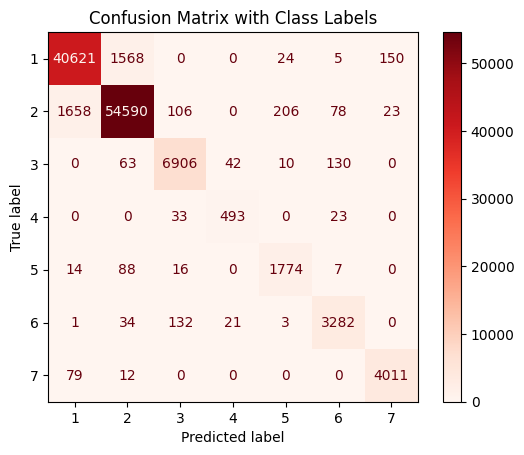

In [32]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

# Feature Importance Visualization

In [34]:
# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Get feature importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

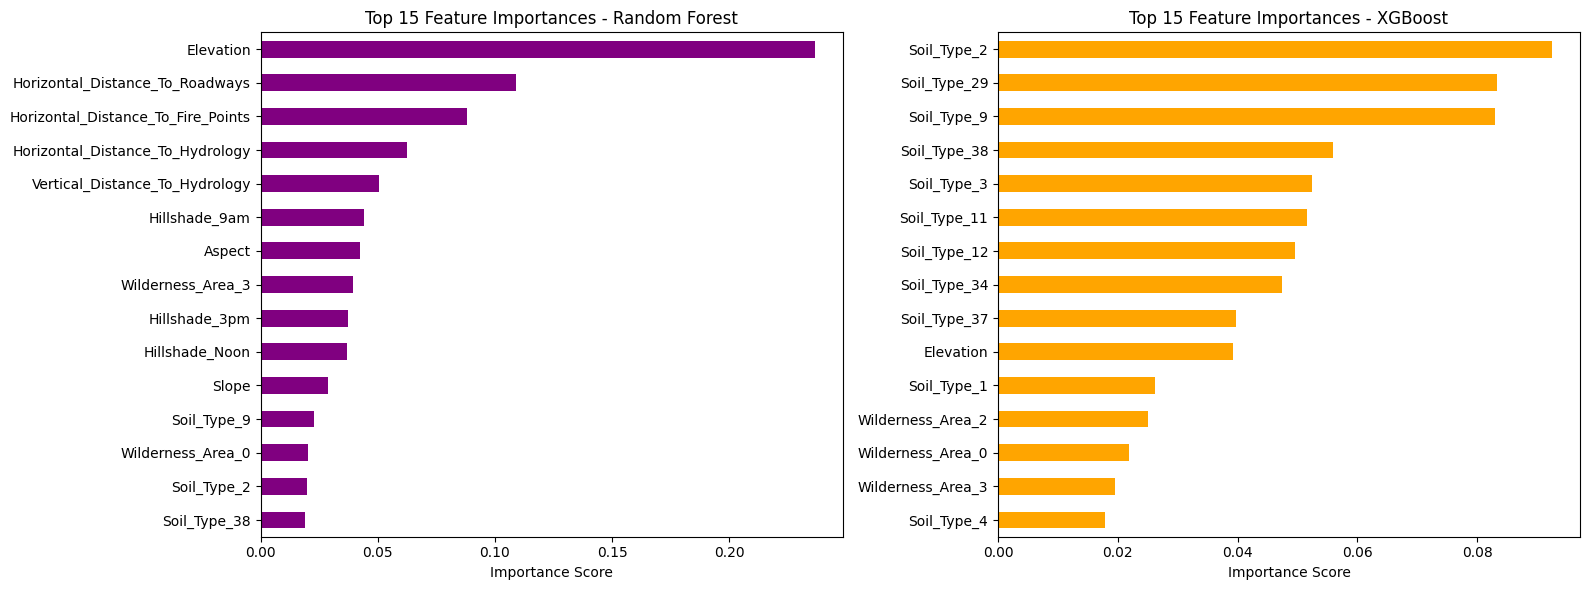

In [35]:
fig , axes = plt.subplots(1,2, figsize = (16,6))

rf_importances.head(15).sort_values().plot(kind = 'barh' , color = 'purple' , ax = axes[0])

axes[0].set_title("Top 15 Feature Importances - Random Forest")
axes[0].set_xlabel("Importance Score")

xgb_importances.head(15).sort_values().plot(kind = 'barh' , color = 'orange' , ax = axes[1])
axes[1].set_title("Top 15 Feature Importances - XGBoost")
axes[1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

In [36]:
metrics_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1_Score"],
    "Random Forest": [
        accuracy_rf,precision_rf,recall_rf,F1_score_rf
    ],
    "XGBoost": [
        accuracy_xgb,precision_xgb,recall_xgb,F1_score_xgb

    ]
})
metrics_comparison

,Metric,Random Forest,XGBoost
0,Accuracy,0.955079,0.961051
1,Precision,0.946098,0.934766
2,Recall,0.908503,0.948992
3,F1_Score,0.925966,0.941733


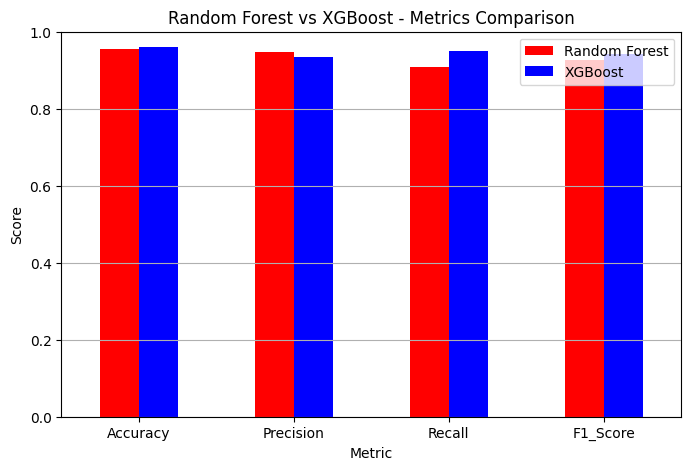

In [37]:
metrics_comparison.set_index("Metric").plot(
    kind='bar', figsize=(8, 5), color=["red", "blue"]
)
plt.title("Random Forest vs XGBoost - Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()